# ELEG815 HW7 
Joseph Cristiano        
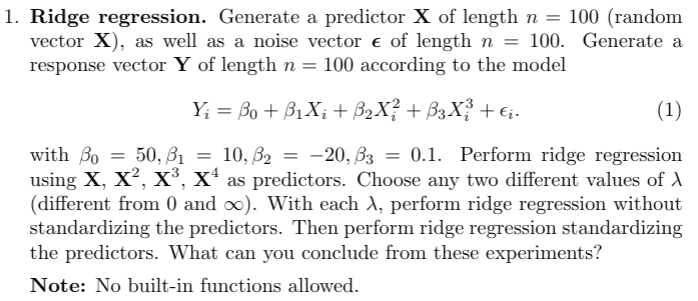

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(69)

# Generate predictor X and noise vector ε
n = 100
X = np.random.randn(n)
epsilon = np.random.randn(n)

# Define coefficients
beta0 = 50
beta1 = 10
beta2 = -20
beta3 = 0.1
# Define two different values of λ
lambda1 = 1
lambda2 = 10
# Generate response vector Y
Y = beta0 + beta1 * X + beta2 * X**2 + beta3 * X**3 + epsilon

# Create a DataFrame with predictors
df = pd.DataFrame({
    'X': X,
    'X2': X**2,
    'X3': X**3,
    'X4': X**4
})

# Perform ridge regression without standardizing the predictors
ridge1 = Ridge(alpha=lambda1)
ridge2 = Ridge(alpha=lambda2)
ridge1.fit(df, Y)
ridge2.fit(df, Y)
# Predictions
Y_pred1 = ridge1.predict(df)
Y_pred2 = ridge2.predict(df)


# Standardize the predictors
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
# Perform ridge regression with standardized predictors
ridge1_standardized = Ridge(alpha=lambda1)
ridge2_standardized = Ridge(alpha=lambda2)
ridge1_standardized.fit(df_standardized, Y)
ridge2_standardized.fit(df_standardized, Y)
# Predictions
Y_pred1_standardized = ridge1_standardized.predict(df_standardized)
Y_pred2_standardized = ridge2_standardized.predict(df_standardized)

In [2]:
class my_RidgeRegression:
    def __init__(self, alpha):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        n, p = X.shape
        I = np.identity(p)
        # Ridge regression formula
        self.coef_ = np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ y
        # Intercept is calculated based on residuals
        # Print the shapes of every variable in this scope  
        test = self.coef_.to_numpy().flatten()
        self.intercept_ = np.mean(y - X @ test)

    def predict(self, X):
        test = self.coef_.to_numpy().flatten()
        return X @ test + self.intercept_

class my_StandardScaler:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean_) / self.scale_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


I decided to use the sklearn library as a guide and compare my results to it. 

NOTE THAT I AM NOT CLAIMING SKLEARNS IMPLEMENTATION AS MY OWN AND MY WORK IS PRESENTED IN THE FINAL 4 GRAPHS

In [3]:
# Perform ridge regression without standardizing the predictors
my_ridge1 = my_RidgeRegression(alpha=lambda1)
my_ridge2 = my_RidgeRegression(alpha=lambda2)
my_ridge1.fit(df, Y)
my_ridge2.fit(df, Y)
# Predictions
my_Y_pred1 = my_ridge1.predict(df)
my_Y_pred2 = my_ridge2.predict(df)


# Standardize the predictors
my_scaler = my_StandardScaler()
my_df_standardized = my_scaler.fit_transform(df)
# Perform ridge regression with standardized predictors
my_ridge1_standardized = my_RidgeRegression(alpha=lambda1)
my_ridge2_standardized = my_RidgeRegression(alpha=lambda2)
my_ridge1_standardized.fit(my_df_standardized, Y)
my_ridge2_standardized.fit(my_df_standardized, Y)
# Predictions
my_Y_pred1_standardized = my_ridge1_standardized.predict(my_df_standardized)
my_Y_pred2_standardized = my_ridge2_standardized.predict(my_df_standardized)

sklearn Ridge Regression (lambda=1) 
 Coefficients
 [  9.74169246 -19.07952266   0.12133886  -0.17788143]
sklearn Ridge Regression (lambda=1) - MSE: 1.2970502655109823, R2: 0.9986831835779125


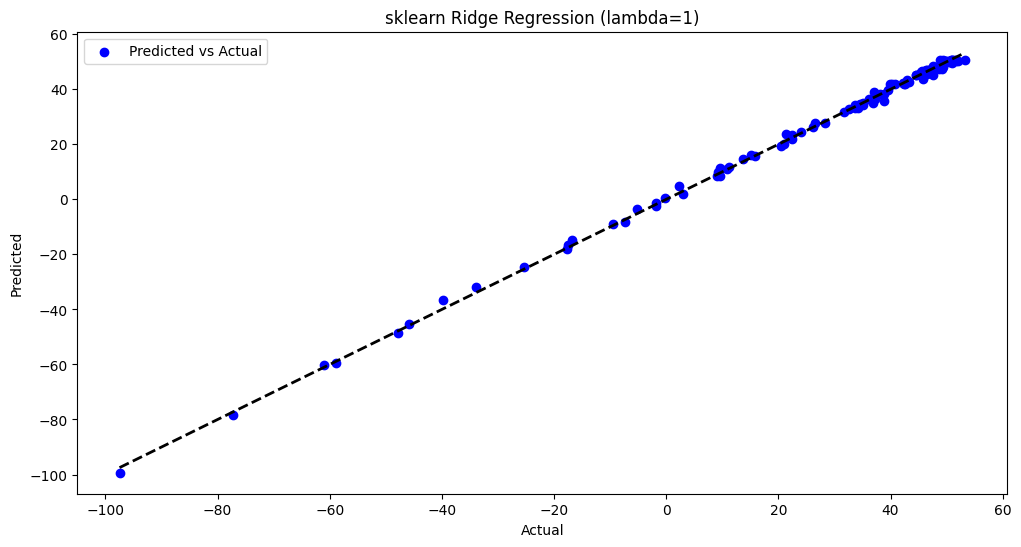

sklearn Ridge Regression (lambda=10) 
 Coefficients
 [  7.94926953 -13.97760175   0.42775727  -1.22268531]
sklearn Ridge Regression (lambda=10) - MSE: 10.858107695333677, R2: 0.9889764221894848


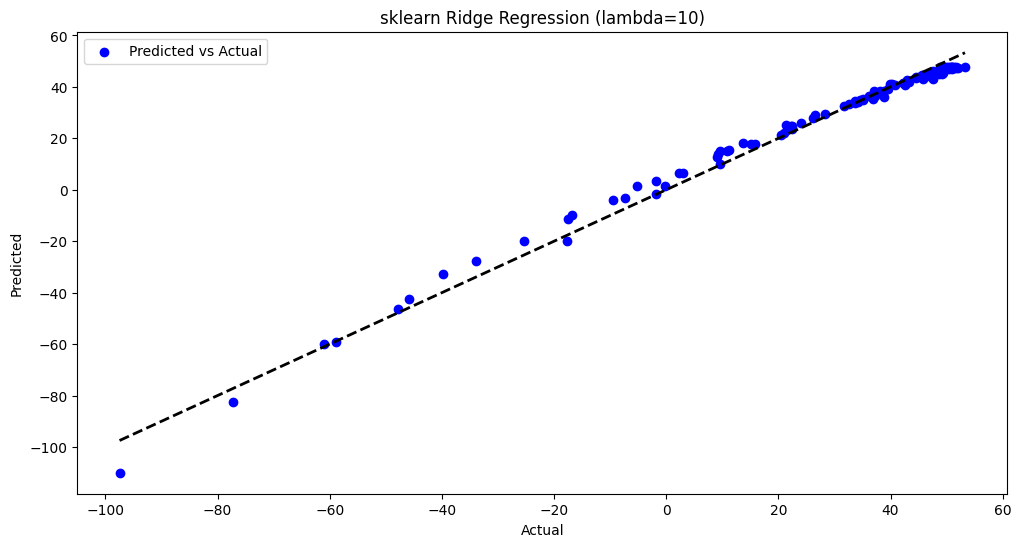

sklearn Ridge Regression (lambda=1) Standardized 
 Coefficients
 [ 10.84229803 -25.04019137   0.3241273   -1.8522286 ]
sklearn Ridge Regression (lambda=1) Standardized - MSE: 1.5860724888422404, R2: 0.9983897568540986


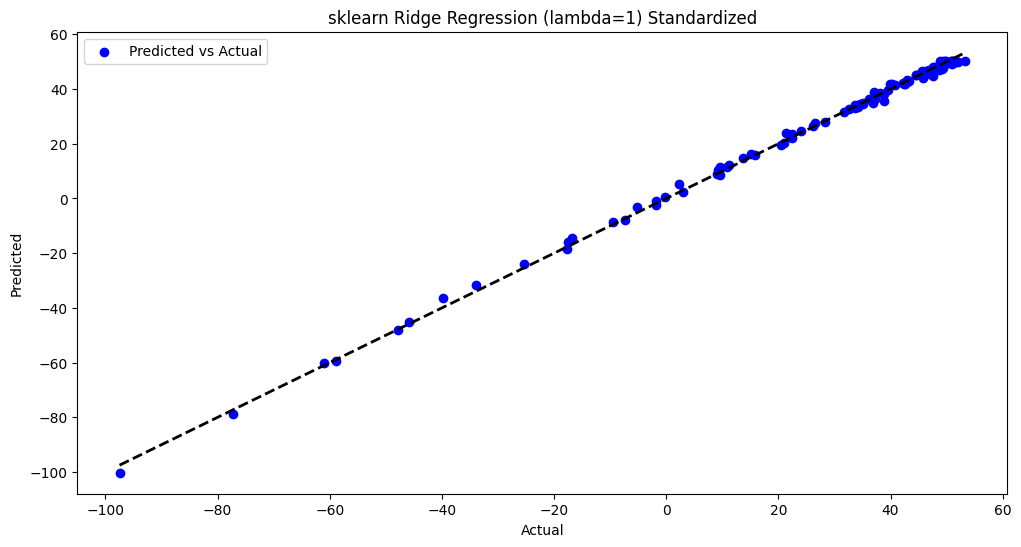

sklearn Ridge Regression (lambda=10) Standardized 
 Coefficients
 [  8.50462224 -18.19928191   1.92814885  -7.40163792]
sklearn Ridge Regression (lambda=10) Standardized - MSE: 13.46583812103491, R2: 0.9863289517403825


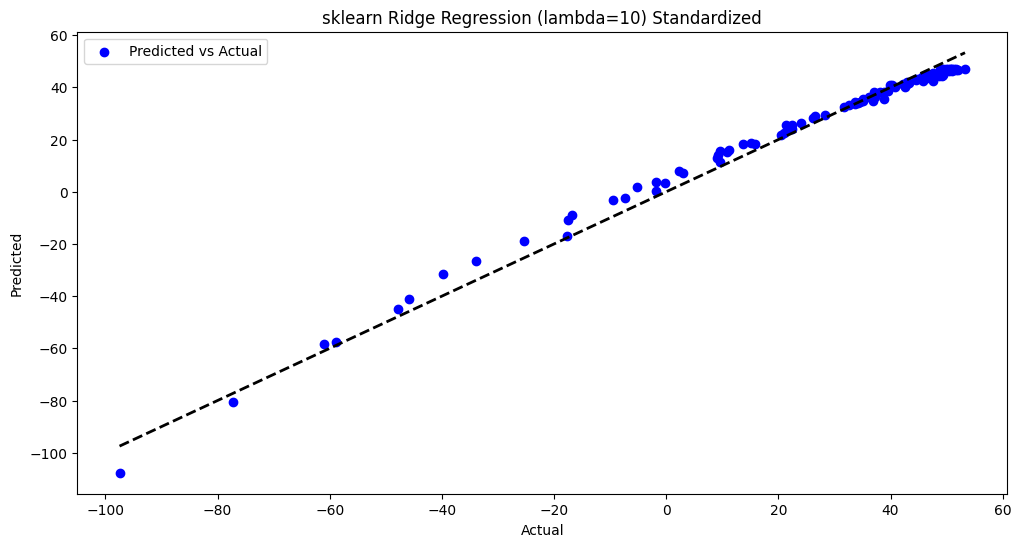

My Ridge Regression (lambda=1) 
 Coefficients
 0    14.386883
1    26.513385
2    -2.377123
3    -8.204129
dtype: float64
My Ridge Regression (lambda=1) - MSE: 577.0315369613058, R2: 0.4141748981226423


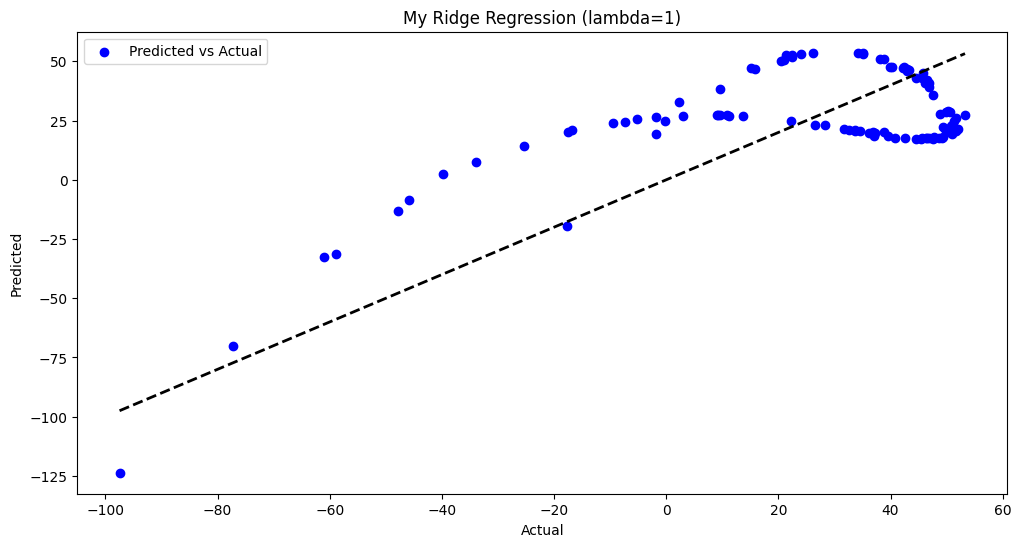

My Ridge Regression (lambda=10) 
 Coefficients
 0     9.861075
1    21.177643
2    -0.573741
3    -6.679895
dtype: float64
My Ridge Regression (lambda=10) - MSE: 517.607527771808, R2: 0.47450448846136417


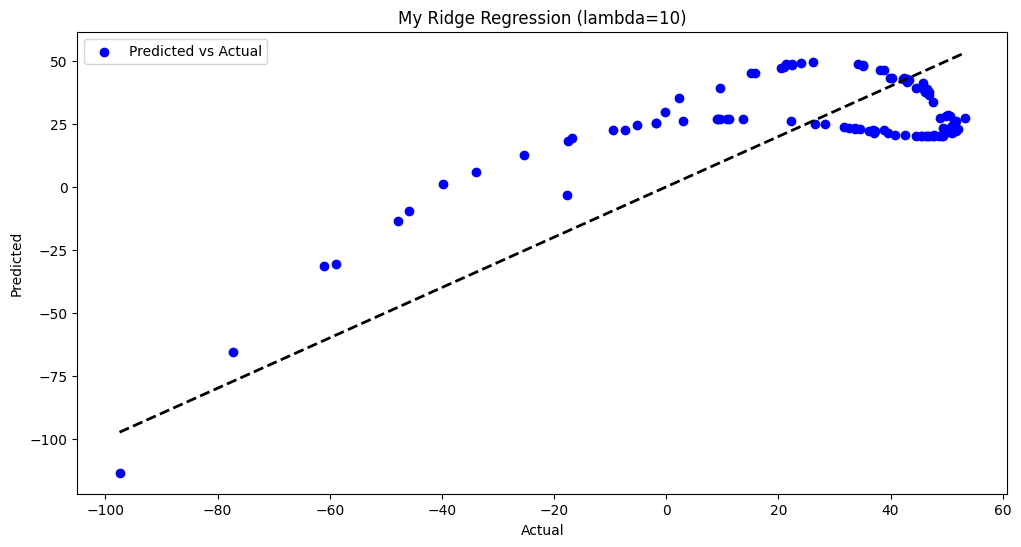

My Ridge Regression (lambda=1) Standardized 
 Coefficients
 0    10.842298
1   -25.040191
2     0.324127
3    -1.852229
dtype: float64
My Ridge Regression (lambda=1) Standardized - MSE: 1.5860724888421833, R2: 0.9983897568540987


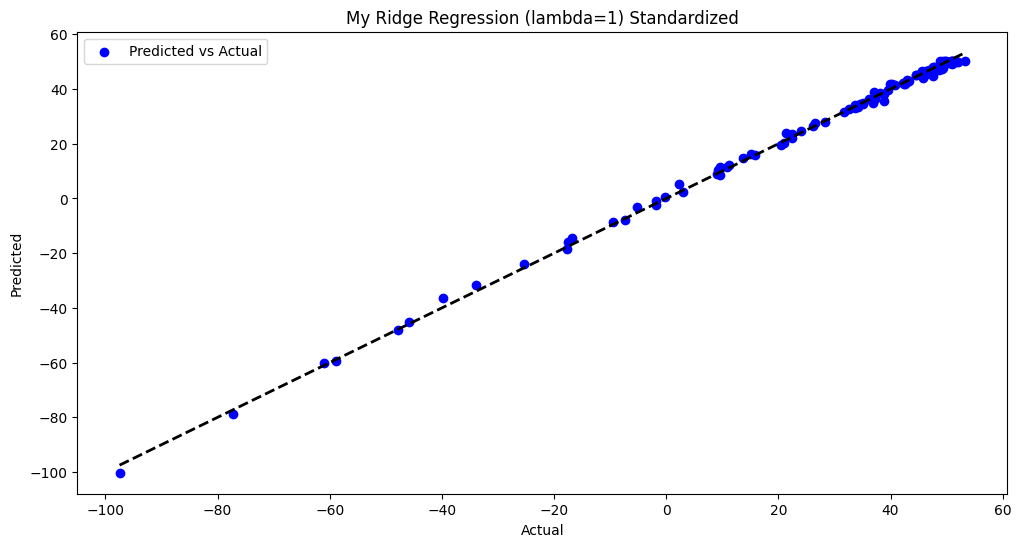

My Ridge Regression (lambda=10) Standardized 
 Coefficients
 0     8.504622
1   -18.199282
2     1.928149
3    -7.401638
dtype: float64
My Ridge Regression (lambda=10) Standardized - MSE: 13.465838121034883, R2: 0.9863289517403825


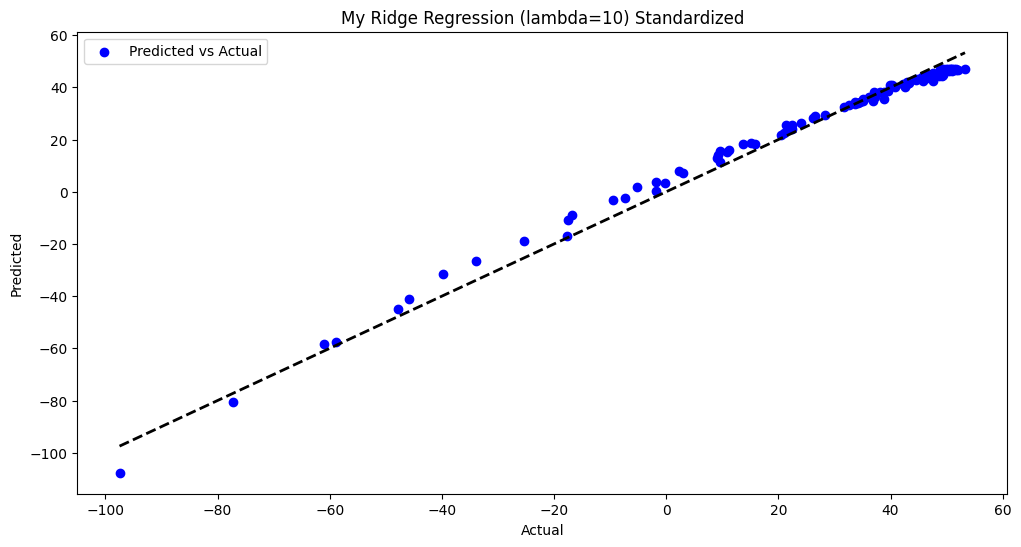

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

def evaluate_ridge_regression(model, X, Y, Y_pred, title):
    # 1. Examine the Coefficients
    print(f"{title} \n Coefficients\n", model.coef_)

    # 2. Assess Model Performance
    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)

    print(f"{title} - MSE: {mse}, R2: {r2}")

    # 3. Visualize the Results
    plt.figure(figsize=(12, 6))
    plt.scatter(Y, Y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

# Evaluate the 4 pairs of ridge regressions
evaluate_ridge_regression(ridge1, df, Y, Y_pred1, "sklearn Ridge Regression (lambda=1)")
evaluate_ridge_regression(ridge2, df, Y, Y_pred2, "sklearn Ridge Regression (lambda=10)")
evaluate_ridge_regression(ridge1_standardized, df_standardized, Y, Y_pred1_standardized, "sklearn Ridge Regression (lambda=1) Standardized")
evaluate_ridge_regression(ridge2_standardized, df_standardized, Y, Y_pred2_standardized, "sklearn Ridge Regression (lambda=10) Standardized")

evaluate_ridge_regression(my_ridge1, df, Y, my_Y_pred1, "My Ridge Regression (lambda=1)")
evaluate_ridge_regression(my_ridge2, df, Y, my_Y_pred2, "My Ridge Regression (lambda=10)")
evaluate_ridge_regression(my_ridge1_standardized, my_df_standardized, Y, my_Y_pred1_standardized, "My Ridge Regression (lambda=1) Standardized")
evaluate_ridge_regression(my_ridge2_standardized, my_df_standardized, Y, my_Y_pred2_standardized, "My Ridge Regression (lambda=10) Standardized")


I do not understand why my implementation doesn't work on non-standardized data. I think it might have something to do with the coeficients being the wrong dimension.


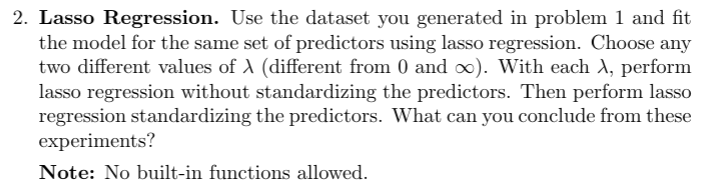

In [37]:
from sklearn.linear_model import Lasso

# Define two different values of λ for Lasso regression
lambda_lasso1 = 0.1
lambda_lasso2 = 1.0

# Perform Lasso regression without standardizing the predictors
lasso1 = Lasso(alpha=lambda_lasso1)
lasso2 = Lasso(alpha=lambda_lasso2)
lasso1.fit(df, Y)
lasso2.fit(df, Y)
# Predictions
Y_lasso_pred1 = lasso1.predict(df)
Y_lasso_pred2 = lasso2.predict(df)

# Perform Lasso regression with standardized predictors
lasso1_standardized = Lasso(alpha=lambda_lasso1)
lasso2_standardized = Lasso(alpha=lambda_lasso2)
lasso1_standardized.fit(df_standardized, Y)
lasso2_standardized.fit(df_standardized, Y)
# Predictions
Y_lasso_pred1_standardized = lasso1_standardized.predict(df_standardized)
Y_lasso_pred2_standardized = lasso2_standardized.predict(df_standardized)


In [28]:
class my_LassoRegression:
    def __init__(self, alpha=1.0, max_iter=1000, tol=1e-4):
        self.alpha = alpha  # Regularization parameter (equivalent to lambda)
        self.max_iter = max_iter  # Maximum number of iterations
        self.tol = tol  # Tolerance for stopping criterion

    # Soft-thresholding operator for L1 penalty
    def soft_threshold(self, rho, lambda_val):
        if rho < -lambda_val:
            return rho + lambda_val
        elif rho > lambda_val:
            return rho - lambda_val
        else:
            return 0

    # Fit the model using coordinate descent
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)  # Initialize coefficients
        
        for iteration in range(self.max_iter):
            coef_old = np.copy(self.coef_)
            for j in range(n_features):
                # Residual with all coefficients except j-th one
                residual = y - X @ self.coef_ + X[:, j] * self.coef_[j]
                # Update the j-th coefficient using the soft-thresholding operator
                rho = X[:, j].T @ residual
                self.coef_[j] = self.soft_threshold(rho, self.alpha)

            # Check for convergence
            if np.sum(np.abs(self.coef_ - coef_old)) < self.tol:
                break

        return self

    # Predict function
    def predict(self, X):
        return X @ self.coef_
        

/tmp/ipykernel_129314/1270992756.py:27: RuntimeWarning: overflow encountered in matmul
  rho = X[:, j].T @ residual
/tmp/ipykernel_129314/1270992756.py:27: RuntimeWarning: invalid value encountered in matmul
  rho = X[:, j].T @ residual
/tmp/ipykernel_129314/1270992756.py:25: RuntimeWarning: invalid value encountered in matmul
  residual = y - X @ self.coef_ + X[:, j] * self.coef_[j]
/tmp/ipykernel_129314/1270992756.py:25: RuntimeWarning: invalid value encountered in add
  residual = y - X @ self.coef_ + X[:, j] * self.coef_[j]
/tmp/ipykernel_129314/1270992756.py:25: RuntimeWarning: overflow encountered in matmul
  residual = y - X @ self.coef_ + X[:, j] * self.coef_[j]
/tmp/ipykernel_129314/1270992756.py:25: RuntimeWarning: overflow encountered in multiply
  residual = y - X @ self.coef_ + X[:, j] * self.coef_[j]


sklearn Lasso Regression (lambda=0.1) 
 Coefficients
 [  9.75797697 -19.58266976   0.13308353  -0.06891399]
sklearn Lasso Regression (lambda=0.1) - MSE: 1.15864019026563, R2: 0.998823702927788


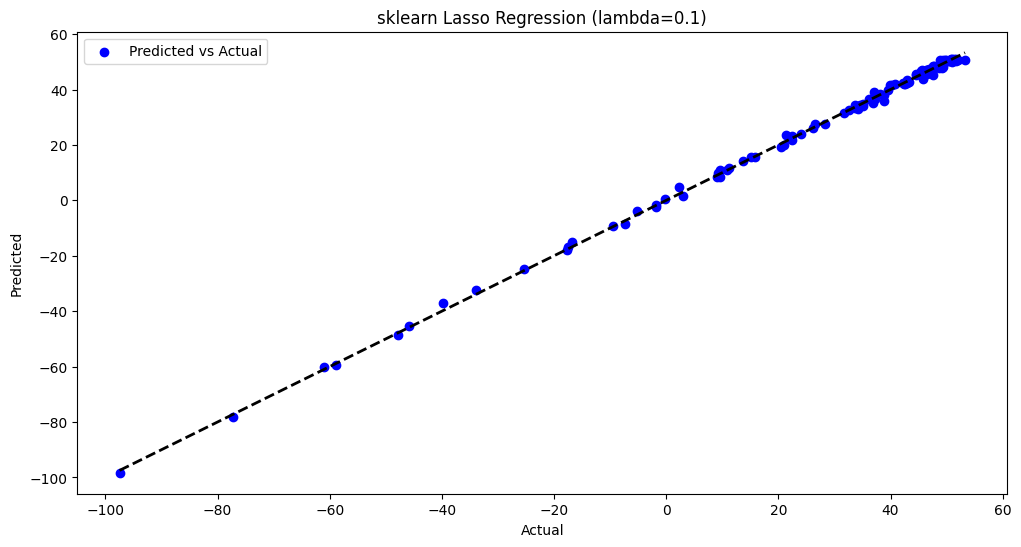

sklearn Lasso Regression (lambda=1.0) 
 Coefficients
 [  7.75494945 -16.52744171   0.53369623  -0.66225061]
sklearn Lasso Regression (lambda=1.0) - MSE: 5.617985380001357, R2: 0.9942964003754174


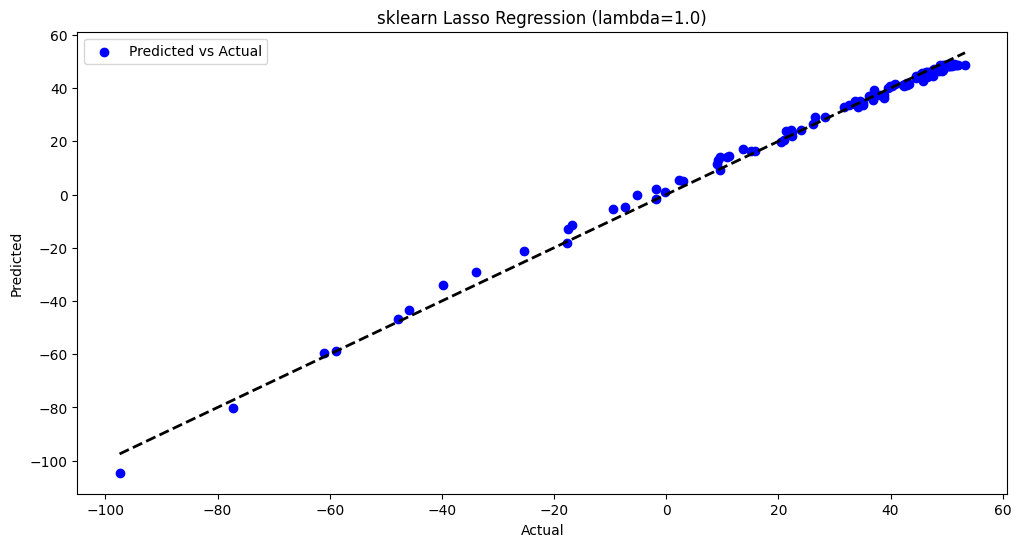

sklearn Lasso Regression (lambda=0.1) Standardized 
 Coefficients
 [ 1.10102770e+01 -2.68684593e+01  3.15569659e-01 -2.19461565e-02]
sklearn Lasso Regression (lambda=0.1) Standardized - MSE: 1.1318075794393272, R2: 0.9988509444492025


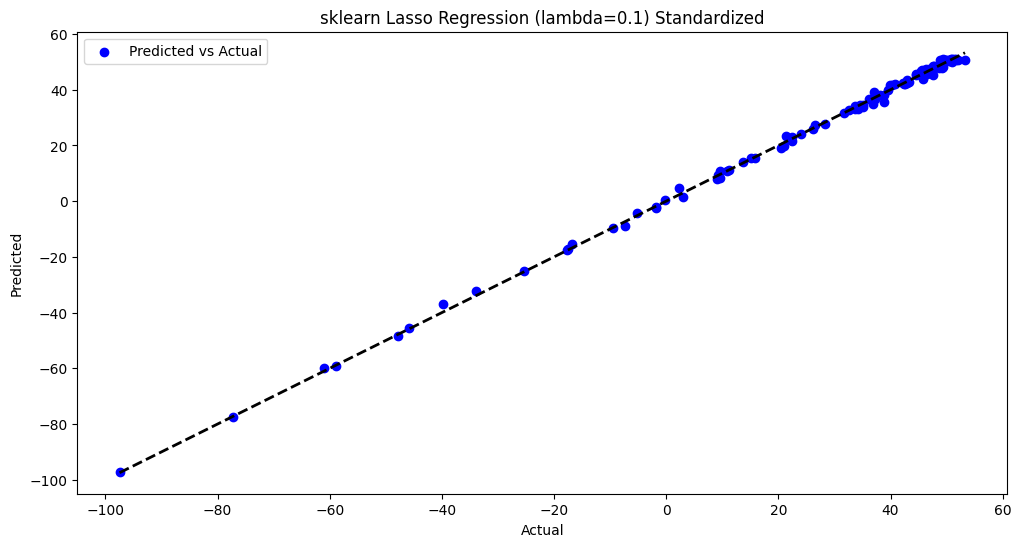

sklearn Lasso Regression (lambda=1.0) Standardized 
 Coefficients
 [ 10.17444067 -26.07774664   0.41462572  -0.04923057]
sklearn Lasso Regression (lambda=1.0) Standardized - MSE: 2.7769354372456077, R2: 0.997180745971012


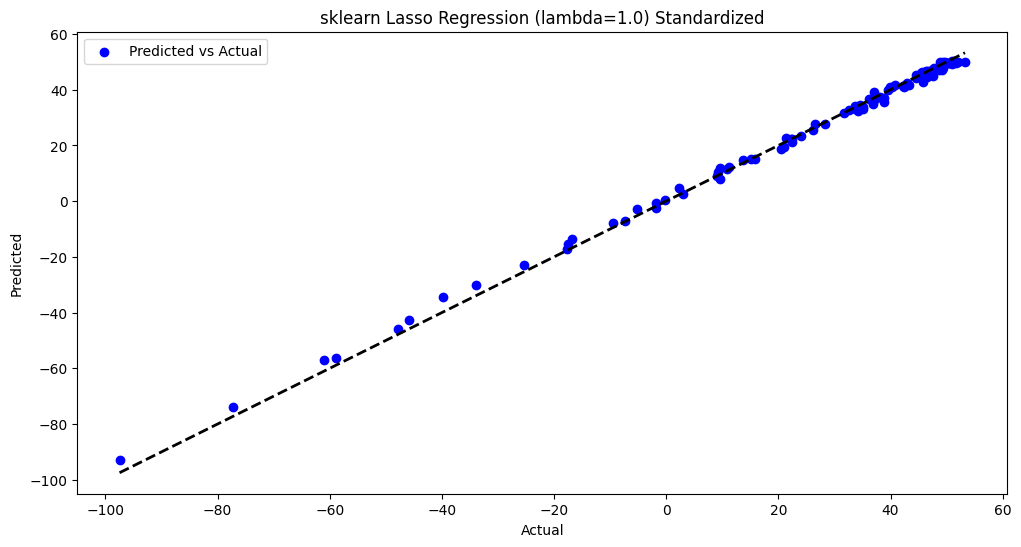

My Lasso Regression (lambda=0.1) 
 Coefficients
 [-7.37646006e+170 -2.17553767e+172 -4.30204291e+174 -4.91664942e+177]
My Lasso Regression (lambda=0.1) - MSE: inf, R2: -inf


/home/jcristia/Documents/GitHub/code_notebooks/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/jcristia/Documents/GitHub/code_notebooks/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


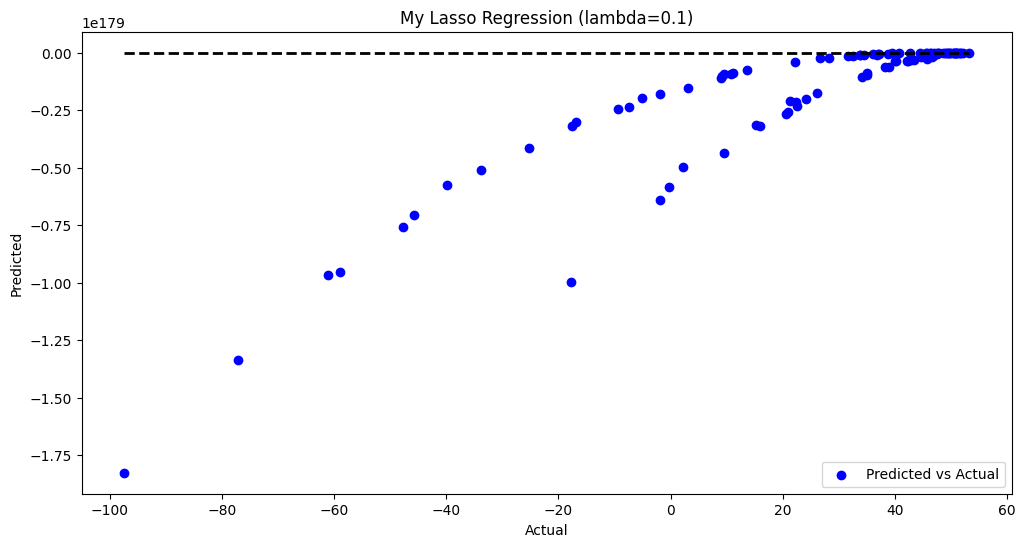

My Lasso Regression (lambda=1.0) 
 Coefficients
 [-7.37574165e+170 -2.17532580e+172 -4.30162393e+174 -4.91617058e+177]
My Lasso Regression (lambda=1.0) - MSE: inf, R2: -inf


/home/jcristia/Documents/GitHub/code_notebooks/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/jcristia/Documents/GitHub/code_notebooks/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


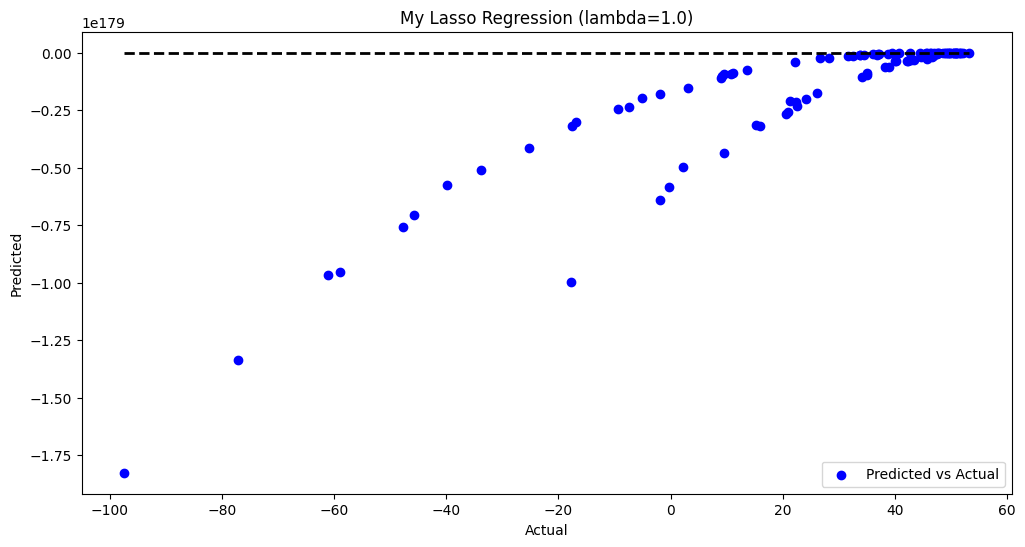

My Lasso Regression (lambda=0.1) Standardized 
 Coefficients
 [2.96064275e+159 4.96054799e+160 1.50551913e+162 6.80864003e+163]
My Lasso Regression (lambda=0.1) Standardized - MSE: inf, R2: -inf


/home/jcristia/Documents/GitHub/code_notebooks/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/jcristia/Documents/GitHub/code_notebooks/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


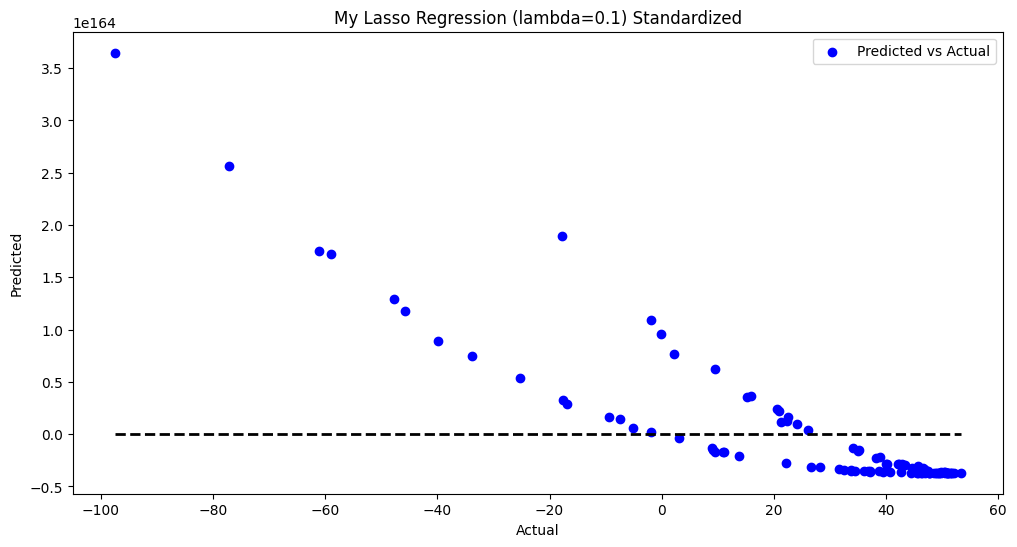

My Lasso Regression (lambda=1.0) Standardized 
 Coefficients
 [2.95878719e+159 4.95743900e+160 1.50457556e+162 6.80437276e+163]
My Lasso Regression (lambda=1.0) Standardized - MSE: inf, R2: -inf


/home/jcristia/Documents/GitHub/code_notebooks/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:510: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/home/jcristia/Documents/GitHub/code_notebooks/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1220: RuntimeWarning: overflow encountered in square
  numerator = xp.sum(weight * (y_true - y_pred) ** 2, axis=0)


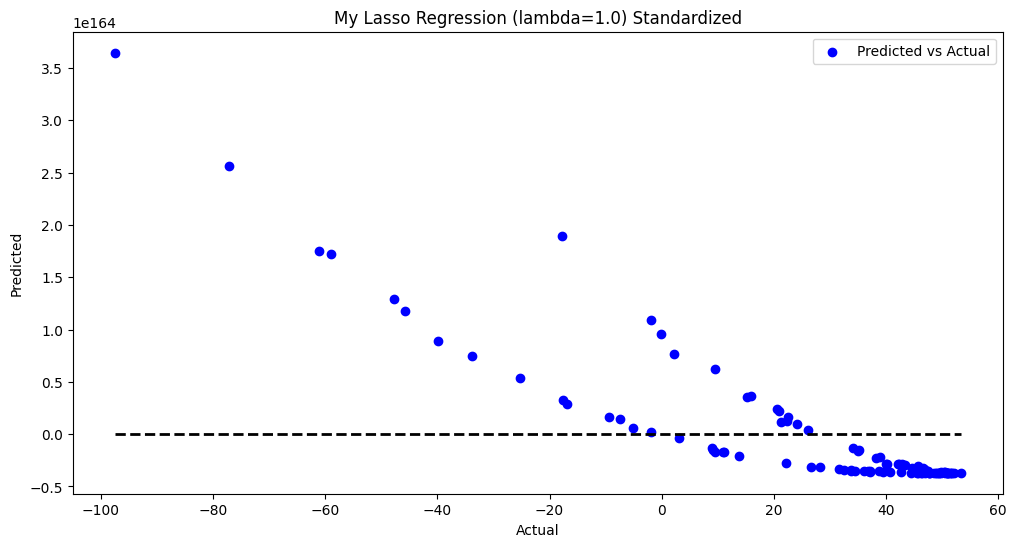

In [40]:
# Perform Lasso regression without standardizing the predictors
my_lasso1 = my_LassoRegression(alpha=lambda_lasso1)
my_lasso2 = my_LassoRegression(alpha=lambda_lasso2)
my_lasso1.fit(df.values, Y)
my_lasso2.fit(df.values, Y)
# Predictions
my_Y_lasso_pred1 = my_lasso1.predict(df)
my_Y_lasso_pred2 = my_lasso2.predict(df)

# Perform Lasso regression with standardized predictors
my_lasso1_standardized = my_LassoRegression(alpha=lambda_lasso1)
my_lasso2_standardized = my_LassoRegression(alpha=lambda_lasso2)
my_lasso1_standardized.fit(my_df_standardized.values, Y)
my_lasso2_standardized.fit(my_df_standardized.values, Y)
# Predictions
my_Y_lasso_pred1_standardized = my_lasso1_standardized.predict(my_df_standardized)
my_Y_lasso_pred2_standardized = my_lasso2_standardized.predict(my_df_standardized)

#Evaluate the Lasso regression models
evaluate_ridge_regression(lasso1, df, Y, Y_lasso_pred1, "sklearn Lasso Regression (lambda=0.1)")
evaluate_ridge_regression(lasso2, df, Y, Y_lasso_pred2, "sklearn Lasso Regression (lambda=1.0)")
evaluate_ridge_regression(lasso1_standardized, df_standardized, Y, Y_lasso_pred1_standardized, "sklearn Lasso Regression (lambda=0.1) Standardized")
evaluate_ridge_regression(lasso2_standardized, df_standardized, Y, Y_lasso_pred2_standardized, "sklearn Lasso Regression (lambda=1.0) Standardized")

evaluate_ridge_regression(my_lasso1, df, Y, my_Y_lasso_pred1, "My Lasso Regression (lambda=0.1)")
evaluate_ridge_regression(my_lasso2, df, Y, my_Y_lasso_pred2, "My Lasso Regression (lambda=1.0)")
evaluate_ridge_regression(my_lasso1_standardized, my_df_standardized, Y, my_Y_lasso_pred1_standardized, "My Lasso Regression (lambda=0.1) Standardized")
evaluate_ridge_regression(my_lasso2_standardized, my_df_standardized, Y, my_Y_lasso_pred2_standardized, "My Lasso Regression (lambda=1.0) Standardized")



In [36]:
# Regularization parameter alpha (equivalent to lambda)
alpha_value = 0.1
# Instantiate and fit the Lasso model
lasso = my_LassoRegression(alpha=alpha_value)
lasso.fit(df_standardized.astype(np.float64), Y.astype(np.float64))  # Convert DataFrame to NumPy array
lasso.predict(df_standardized.astype(np.float64))  # Convert DataFrame to NumPy array
# Get the coefficients
print("Lasso coefficients:", lasso.coef_)

Lasso coefficients: [2.96064275e+159 4.96054799e+160 1.50551913e+162 6.80864003e+163]


/tmp/ipykernel_129314/1270992756.py:27: RuntimeWarning: overflow encountered in matmul
  rho = X[:, j].T @ residual
/tmp/ipykernel_129314/1270992756.py:27: RuntimeWarning: invalid value encountered in matmul
  rho = X[:, j].T @ residual
/tmp/ipykernel_129314/1270992756.py:25: RuntimeWarning: invalid value encountered in add
  residual = y - X @ self.coef_ + X[:, j] * self.coef_[j]


Once again comparing my results to skearn and this time the comparison is even less favorable, but I am unfortunately too tired to fix it. :(